In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [98]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
news_df = df.copy()
# news_df = df.sample(n=10000, random_state=42)


In [45]:
print("Basic Understanding of the dataset")
print(news_df.info())
print(news_df.head(2))

Basic Understanding of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                    headline  \
0           0     Stocks That Hit 52-Week Highs On Friday   
1           1  Stocks That Hit 52-Week Highs On Wednesday   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   

                        date stock  
0  2020-06-05 

In [88]:
print("Basic Statistics for Textual Lengths in 'headline' Column")

news_df["headline_word_count"] = news_df["headline"].astype(str).str.split().str.len()
news_df["headline_char_count"] = news_df["headline"].astype(str).str.len()

colums_to_describe = ["headline_char_count", "headline_word_count"]

print(news_df[colums_to_describe].describe())


Basic Statistics for Textual Lengths in 'headline' Column
       headline_char_count  headline_word_count
count         1.407328e+06         1.407328e+06
mean          7.312051e+01         1.141671e+01
std           4.073531e+01         6.352997e+00
min           3.000000e+00         1.000000e+00
25%           4.700000e+01         7.000000e+00
50%           6.400000e+01         1.000000e+01
75%           8.700000e+01         1.300000e+01
max           5.120000e+02         7.700000e+01


In [47]:
print("Top 10 Most Active Publishers Based on Article Count:")

top_publishers = (
    news_df.groupby("publisher")
    .agg(article_count=("headline", "count"))
    .sort_values("article_count", ascending=False)
    .head(10)
    .reset_index()
)

print(top_publishers)

Top 10 Most Active Publishers Based on Article Count:
           publisher  article_count
0      Paul Quintaro         228373
1         Lisa Levin         186979
2  Benzinga Newsdesk         150484
3      Charles Gross          96732
4      Monica Gerson          82380
5       Eddie Staley          57254
6         Hal Lindon          49047
7      ETF Professor          28489
8         Juan Lopez          28438
9     Benzinga Staff          28114


Publlication Trends over time


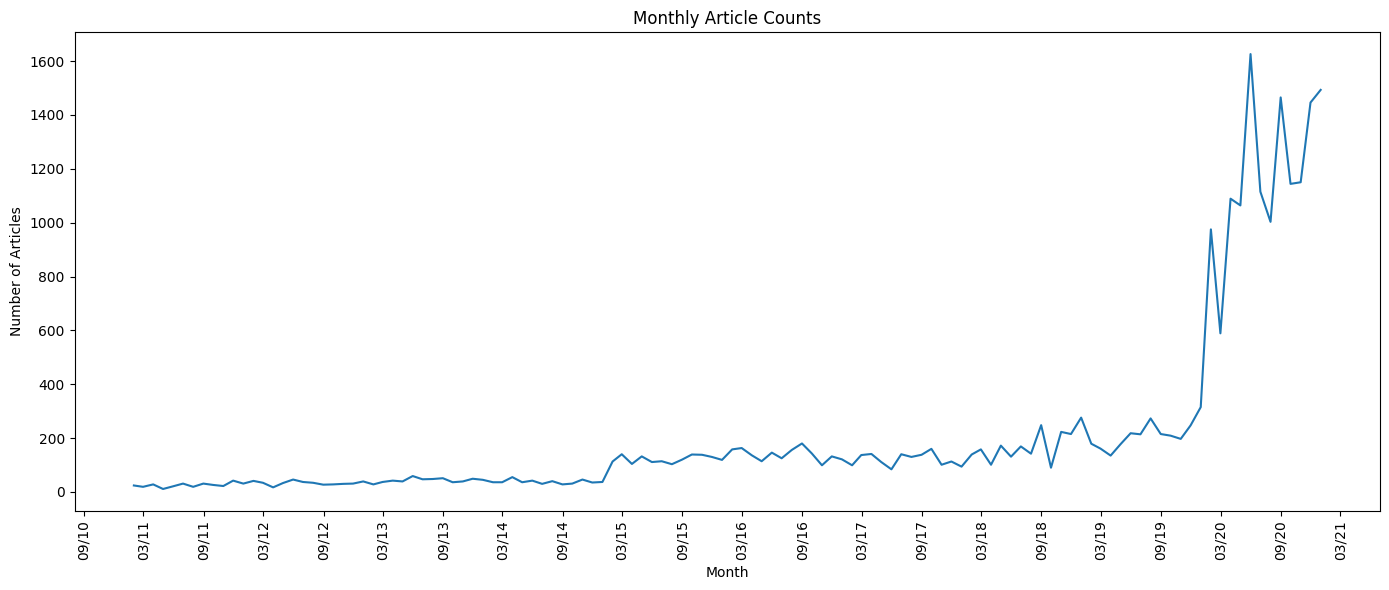

In [109]:
print("Publlication Trends over time")

news_df["date"] = pd.to_datetime(
    news_df["date"], errors="coerce", dayfirst=True, utc=True
).dt.tz_localize(None)

monthly_counts = news_df.resample("ME", on="date").size()

full_index = pd.date_range(
    start=monthly_counts.index.min(), end=monthly_counts.index.max(), freq="ME"
)

monthly_counts = monthly_counts.reindex(full_index, fill_value=0)

plt.figure(figsize=(14, 6))
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title("Monthly Article Counts")
plt.xlabel("Month")
plt.ylabel("Number of Articles")


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()